In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from kneed import KneeLocator

In [2]:
# generating sample data using make_blob 
x,y=make_blobs(n_samples=300,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=1)
range_n_cluster=[2,3,4,5,6]


In [3]:
# creating a data set out of sample dataset
df= pd.DataFrame(x, columns=['Feature_1', 'Feature_2'])
df['Cluster'] = y

In [8]:
# splitting the data and scaling them
scaler=StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

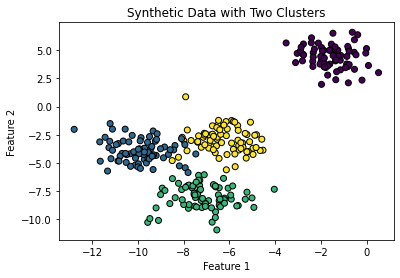

In [4]:
# Visualize the sample  dataset
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'], cmap='viridis', edgecolors='k')
plt.title('Synthetic Data with Two Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [11]:
# elbow method to find k value
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x_train_scaled) 
    wcss.append(kmeans.inertia_)
wcss

C:\Users\vignesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[402.0,
 98.97956004222308,
 58.31813081400348,
 27.106787980524015,
 22.938852905975477,
 18.87751315270749,
 16.3591175318338,
 15.081601826064567,
 13.180121229368687,
 11.887579968162578]

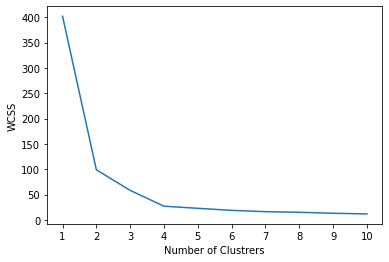

In [12]:
# ploting elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [13]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [15]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

2

In [25]:
## silhoutte score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.6957645761311699,
 0.5198915870781351,
 0.626787983891108,
 0.5708055385760324,
 0.547089409950856,
 0.4354714024213998,
 0.3934890488014715,
 0.3882811919212729,
 0.3670985157405992]

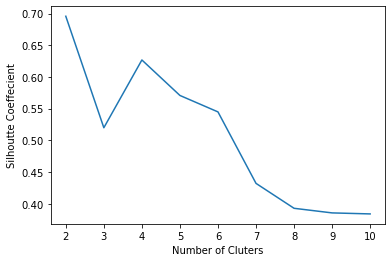

In [20]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

# we got K value as 2 confirmed

In [42]:
# using k means clustering
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(x)

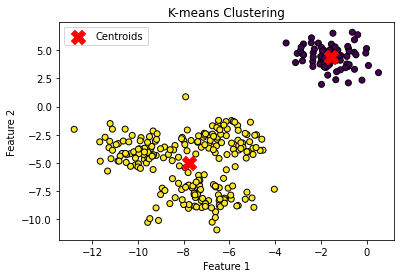

In [43]:

# Visualize the K-means clusters
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['KMeans_Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# We got k as 2 and we  plotted 2 clusters 